 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = pd.read_csv("../Resources/whale_returns.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)
# YOUR CODE HERE
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_returns_csv.shape

(1060, 4)

In [4]:
# Count nulls
# YOUR CODE HERE
whale_null = whale_returns_csv.isnull().sum().sum()
whale_null

4

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_data = whale_returns_csv.dropna()
whale_null2 = whale_data.isnull().sum().sum()
whale_null2

0

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
# YOUR CODE HERE
algo_returns_csv = pd.read_csv("../Resources/algo_returns.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)

In [7]:
# Count nulls
# YOUR CODE HERE
algo_null = algo_returns_csv.isnull().sum().sum()
algo_null

6

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_data = algo_returns_csv.dropna()
algo_null2 = algo_data.isnull().sum().sum()
algo_null2

0

In [9]:
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
# YOUR CODE HERE
sp500_returns_csv = pd.read_csv("../Resources/sp500_history.csv", index_col='Date', parse_dates=True, infer_datetime_format=True)


In [11]:
# Check Data Types
# YOUR CODE HERE
sp500_returns_csv.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
sp500_returns_csv['Close'] = sp500_returns_csv['Close'].str.replace('$', '')
sp500_returns_csv['Close'] = sp500_returns_csv.Close.astype(float)
sp500_returns_csv.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_data = sp500_returns_csv.pct_change()

In [14]:
sp500_data.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
# YOUR CODE HERE
sp500_data.dropna(inplace =True)

In [16]:
sp500_data.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [17]:
# Rename Column
# YOUR CODE HERE
sp500_data.columns = ['SP500']

In [18]:
sp500_data.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_data, algo_data, sp500_data], axis="columns", join="inner")

In [21]:
combined_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

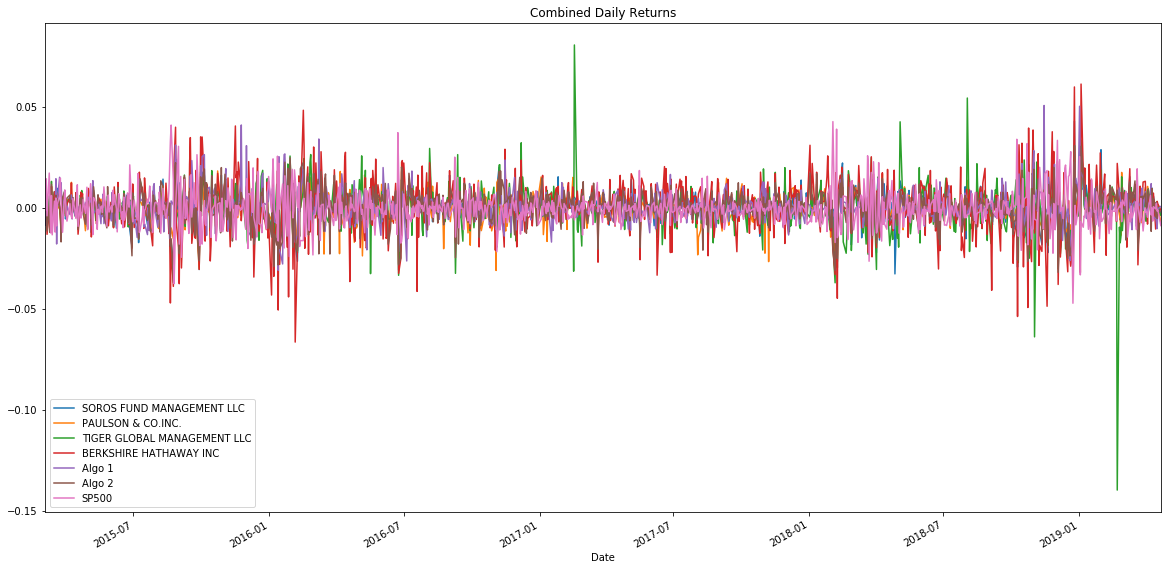

In [22]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(title="Combined Daily Returns", figsize=(20, 10))

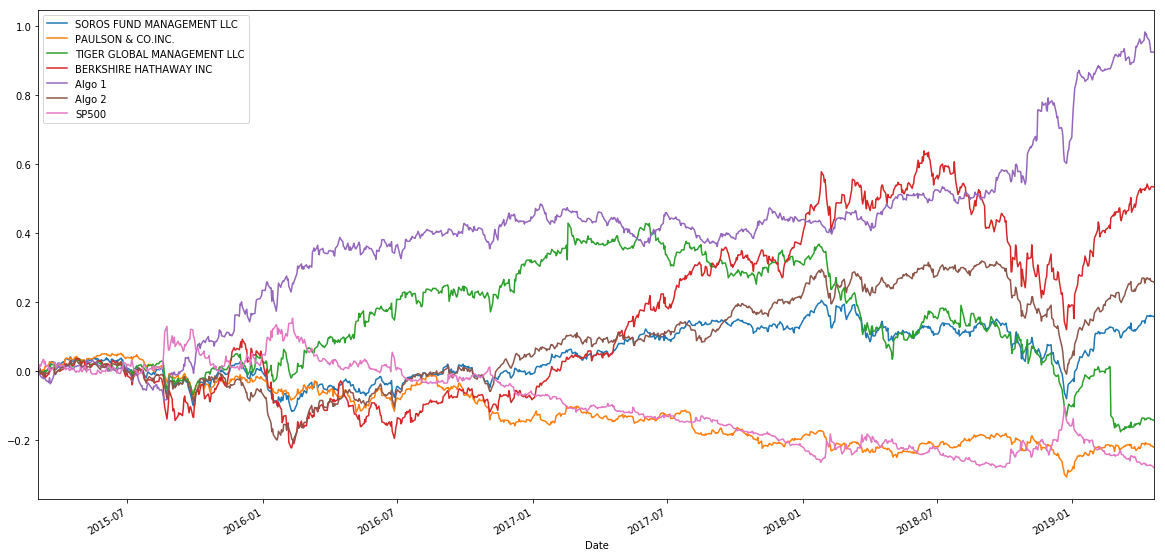

In [23]:
# Plot cumulative returns
# YOUR CODE HERE
((combined_df + 1).cumprod() - 1).plot(figsize=(20, 10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

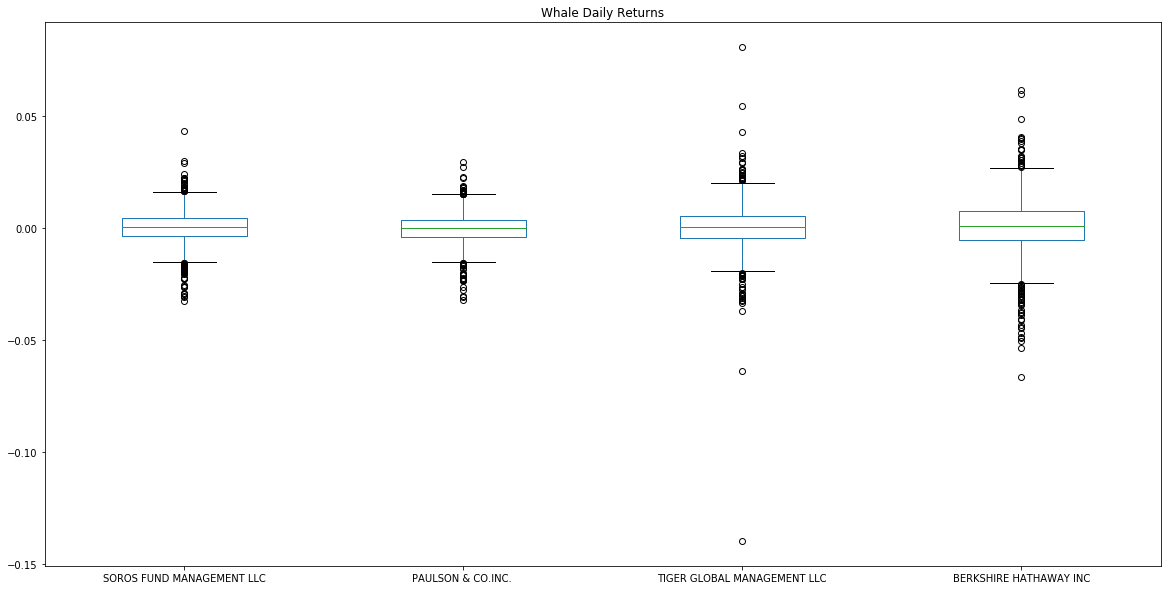

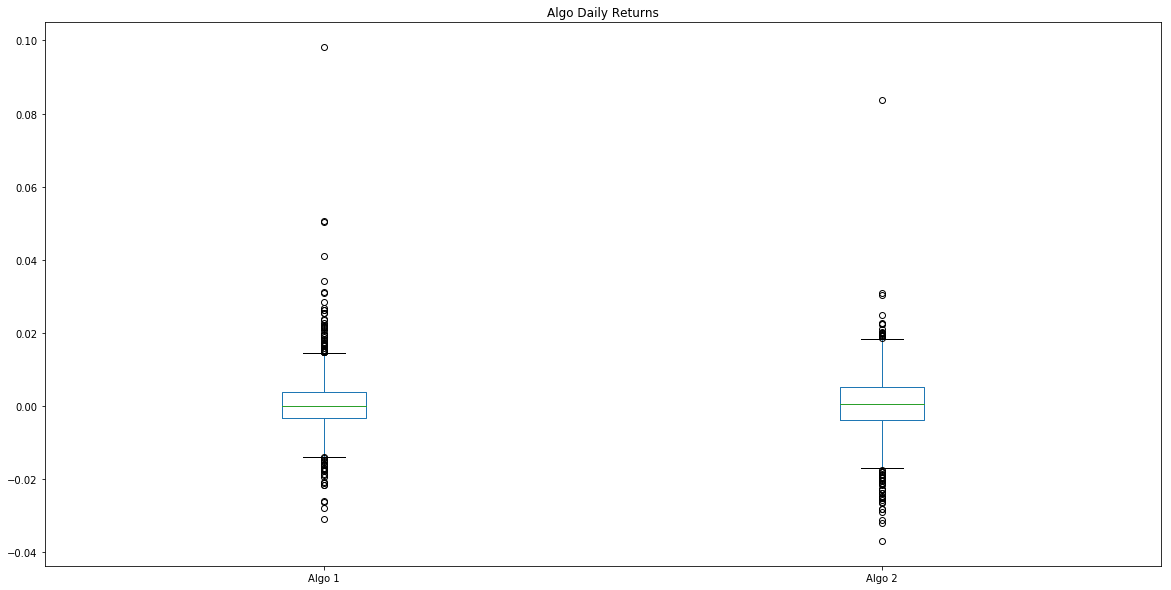

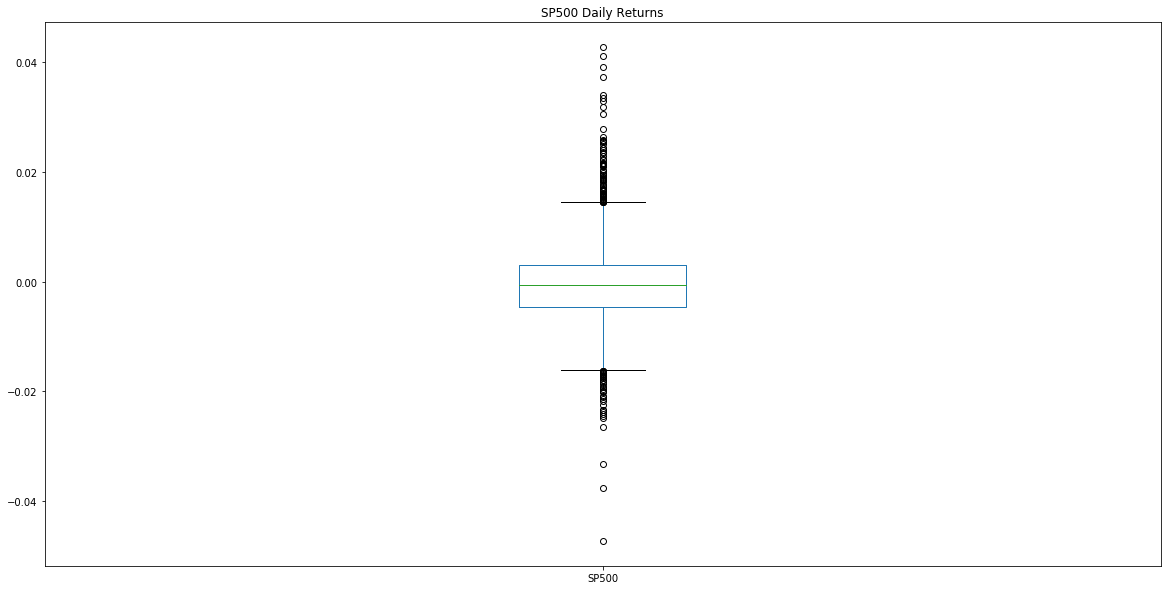

In [24]:
# Box plot to visually show risk
# YOUR CODE 
whale_data.plot(kind="box", title="Whale Daily Returns", figsize=(20, 10))
algo_data.plot(kind="box", title="Algo Daily Returns", figsize=(20, 10))
sp500_data.plot(kind="box", title="SP500 Daily Returns", figsize=(20, 10))

In [26]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
whale_std  = whale_data.std()
algo_std = algo_data.std()
sp500_std = sp500_data.std()

In [27]:
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [28]:
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [29]:
sp500_std

SP500    0.008135
dtype: float64

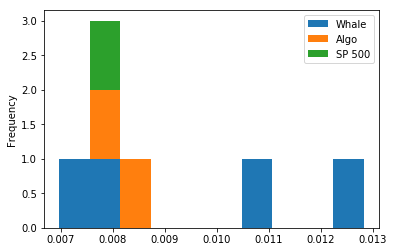

In [30]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
portfolio_std = pd.DataFrame({
    "Whale": whale_std,
    "Algo": algo_std,
    "SP 500": sp500_std
})

portfolio_std.plot.hist(stacked=True, bins=10)

##### The Whale Portfolio is the riskiest of the 3 because it has the higher standard spread of standard deviation

In [31]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_whale_std = whale_std * np.sqrt(252)
annualized_algo_std = algo_std * np.sqrt(252)
annualized_sp500_std = sp500_std * np.sqrt(252)
annualized_portfolio_std = portfolio_std * np.sqrt(252)


In [32]:
annualized_sp500_std

SP500    0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

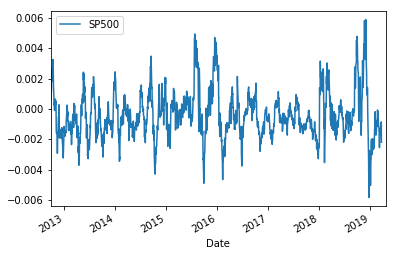

In [34]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_data.rolling(window=21).mean().plot()

In [35]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [36]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
#variance
variance = combined_df['SP500'].var()

#Soros
soros_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['SP500'])
soros_beta = soros_covariance / variance

#Paulson
paulson_covariance = combined_df['PAULSON & CO.INC. '].cov(combined_df['SP500'])
paulson_beta = paulson_covariance / variance

#Tiger
tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['SP500'])
tiger_beta = tiger_covariance / variance

#Berkshire
berkshire_covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500'])
berkshire_beta = berkshire_covariance / variance

#covariance = daily_returns['AMZN'].cov(daily_returns['S&P 500'])
#covariance

#variance = daily_returns['S&P 500'].var()
#variance

#amzn_beta = covariance / variance
#amzn_beta

In [37]:
#print(f'{variance}')
#print(f"{soros_covariance}, {paulson_covariance}, {tiger_covariance}, {berkshire_covariance}")
print(f'The betas for the Whale Portfolio are as follows: \nSoros Fund Management LLC: {soros_beta},\nPaulson & Co. Inc: {paulson_beta} \nTiger Global Management LLC: {tiger_beta} \nBerkshire Hathaway Inc: {berkshire_beta}')

The betas for the Whale Portfolio are as follows: 
Soros Fund Management LLC: 0.0005275302230855206,
Paulson & Co. Inc: 0.0110852308592785 
Tiger Global Management LLC: -0.0019097027512372758 
Berkshire Hathaway Inc: -0.020846489408902668


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [38]:
# (OPTIONAL) YOUR CODE HERE
exponentially_weighted_average = combined_df.ewm(halflife=21).mean()
exponentially_weighted_average.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [39]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

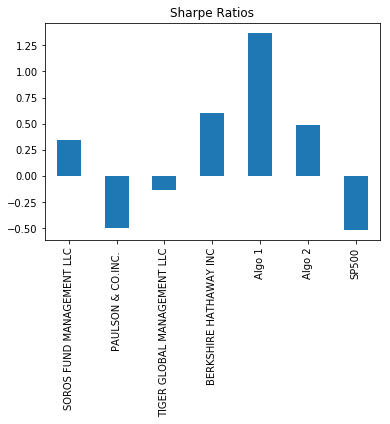

In [40]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Install yfinance package.
!pip install yfinance
     
# Import yfinance
import yfinance as yf  
     
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date

     
# Plot the close prices
#import matplotlib.pyplot as plt
#data.Close.plot()
#plt.show()

In [42]:
from datetime import timedelta
from datetime import date

In [43]:
today = date.today()
beginning_date = today + dt.timedelta(-365)

In [44]:
# Read the first stock
# YOUR CODE HERE
pru_data = yf.download('PRU', beginning_date, today, parse_dates=True, infer_datetime_format=True)

[*********************100%***********************]  1 of 1 downloaded


In [45]:
# Read the second stock
# YOUR CODE HERE
voo_data = yf.download('VOO', beginning_date, today, parse_dates=True, infer_datetime_format=True)

[*********************100%***********************]  1 of 1 downloaded


In [46]:
# Read the third stock
# YOUR CODE HERE
axp_data = yf.download('AXP', beginning_date, today, parse_dates=True, infer_datetime_format=True)

[*********************100%***********************]  1 of 1 downloaded


In [47]:
# Read the third stock
# YOUR CODE HERE
spx_data = yf.download('^GSPC', beginning_date, today, parse_dates=True, infer_datetime_format=True)

[*********************100%***********************]  1 of 1 downloaded


In [48]:
#Latest PRU close data
pru_data.drop(columns =['Open','High','Low','Adj Close','Volume'] , inplace=True)
pru_data.head()

,Close
Date,
2018-09-17,98.99
2018-09-18,100.21
2018-09-19,102.84
2018-09-20,104.23
2018-09-21,104.68


In [49]:
#latest VOO close data
voo_data.drop(columns =['Open','High','Low','Adj Close','Volume'] , inplace=True)
voo_data.head()

,Close
Date,
2018-09-17,265.85
2018-09-18,267.30
2018-09-19,267.60
2018-09-20,269.75
2018-09-21,269.56


In [50]:
#latest #AXP close data
axp_data.drop(columns =['Open','High','Low','Adj Close','Volume'] , inplace=True)
axp_data.head()

,Close
Date,
2018-09-17,109.20
2018-09-18,109.64
2018-09-19,110.10
2018-09-20,111.11
2018-09-21,110.90


In [51]:
#latest SPX close data 
spx_data.drop(columns =['Open','High','Low','Adj Close','Volume'] , inplace=True)
spx_data.head()

,Close
Date,
2018-09-17,2888.80
2018-09-18,2904.31
2018-09-19,2907.95
2018-09-20,2930.75
2018-09-21,2929.67


In [52]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
portfolio_df = pd.concat([pru_data, voo_data, axp_data], axis="columns", join="inner")
portfolio_df.head()

,Close,Close,Close
Date,,,
2018-09-17,98.99,265.85,109.20
2018-09-18,100.21,267.30,109.64
2018-09-19,102.84,267.60,110.10
2018-09-20,104.23,269.75,111.11
2018-09-21,104.68,269.56,110.90


In [53]:
# Reset the index
# YOUR CODE HERE

##### Did not reset because the date time came in from my data pull from yfianance. 

In [54]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
portfolio_df.columns=['PRU','VOO',"AXP"]
portfolio_df.head()

,PRU,VOO,AXP
Date,,,
2018-09-17,98.99,265.85,109.20
2018-09-18,100.21,267.30,109.64
2018-09-19,102.84,267.60,110.10
2018-09-20,104.23,269.75,111.11
2018-09-21,104.68,269.56,110.90


In [55]:
# Drop Nulls
# YOUR CODE HERE
portfolio_df.dropna().head()

,PRU,VOO,AXP
Date,,,
2018-09-17,98.99,265.85,109.20
2018-09-18,100.21,267.30,109.64
2018-09-19,102.84,267.60,110.10
2018-09-20,104.23,269.75,111.11
2018-09-21,104.68,269.56,110.90


In [59]:
#check for null rows
portfolio_df.isnull().values.any()

False

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
daily_returns = portfolio_df.pct_change()
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2018-09-17         NaN
2018-09-18    0.007269
2018-09-19    0.010521
2018-09-20    0.010241
2018-09-21    0.000574
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [61]:
# YOUR CODE HERE
daily_returns['Returns'] = portfolio_returns

In [62]:
daily_returns.head()

,PRU,VOO,AXP,Returns
Date,,,,
2018-09-17,NaN,NaN,NaN,NaN
2018-09-18,0.012324,0.005454,0.004029,0.007269
2018-09-19,0.026245,0.001122,0.004196,0.010521
2018-09-20,0.013516,0.008034,0.009173,0.010241
2018-09-21,0.004317,-0.000704,-0.001890,0.000574


In [63]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
daily_returns.dropna(inplace=True)
daily_returns.head()

,PRU,VOO,AXP,Returns
Date,,,,
2018-09-18,0.012324,0.005454,0.004029,0.007269
2018-09-19,0.026245,0.001122,0.004196,0.010521
2018-09-20,0.013516,0.008034,0.009173,0.010241
2018-09-21,0.004317,-0.000704,-0.001890,0.000574
2018-09-24,-0.013183,-0.003339,-0.009468,-0.008663


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [64]:
# Risk
# YOUR CODE HERE

portfolio_std = portfolio_df.std()
portfolio_std.head()

PRU     7.298734
VOO    12.460607
AXP     9.019171
dtype: float64

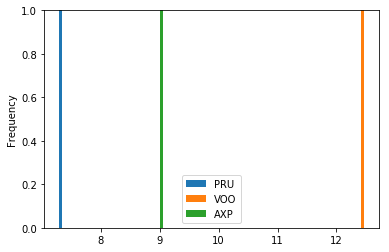

In [65]:
portfolio_std_mapped = pd.DataFrame({
    "PRU": portfolio_df['PRU'].std(),
    "VOO": portfolio_df['VOO'].std(),
    "AXP": portfolio_df['AXP'].std(),
    },
    index=[0])

portfolio_std_mapped.plot.hist(stacked=True, bins=100)

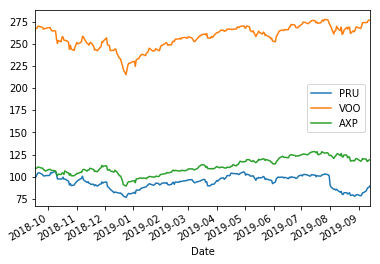

In [66]:
# Rolling
# YOUR CODE HERE
portfolio_df.rolling(window=1).mean().plot()

In [67]:
daily_returns['SPX'] = spx_data.pct_change()
daily_returns.head()

,PRU,VOO,AXP,Returns,SPX
Date,,,,,
2018-09-18,0.012324,0.005454,0.004029,0.007269,0.005369
2018-09-19,0.026245,0.001122,0.004196,0.010521,0.001253
2018-09-20,0.013516,0.008034,0.009173,0.010241,0.007841
2018-09-21,0.004317,-0.000704,-0.001890,0.000574,-0.000369
2018-09-24,-0.013183,-0.003339,-0.009468,-0.008663,-0.003516


In [68]:
# Beta
# YOUR CODE HERE
variance = daily_returns['SPX'].var()


#PRU
pru_covariance = daily_returns['PRU'].cov(daily_returns['SPX'])
pru_beta = pru_covariance / variance

#VOO
voo_covariance = daily_returns['VOO'].cov(daily_returns['SPX'])
voo_beta = voo_covariance / variance

#AXP
axp_covariance = daily_returns['AXP'].cov(daily_returns['SPX'])
axp_beta = axp_covariance / variance


#covariance = daily_returns['AMZN'].cov(daily_returns['S&P 500'])
#covariance

#variance = daily_returns['S&P 500'].var()
#variance

#amzn_beta = covariance / variance
#amzn_beta





In [69]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.drop(['Returns','SPX'])


PRU   -0.219375
VOO    0.322576
AXP    0.527070
dtype: float64

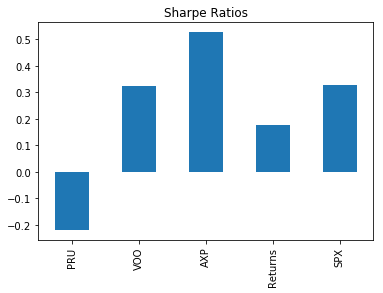

In [70]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar(title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [71]:
# YOUR CODE HERE
correlation = portfolio_df.corr()
correlation

,PRU,VOO,AXP
PRU,1.000000,0.537429,0.303418
VOO,0.537429,1.000000,0.859145
AXP,0.303418,0.859145,1.000000


##### There might be some coorelation between VOO and AXP but overall none of the 3 stocks I picked have any strong correlation. 